In [49]:
import pandas as pd

In [50]:
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [51]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [52]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [53]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

array([[<Axes: title={'center': 'User ID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Purchased'}>]], dtype=object)

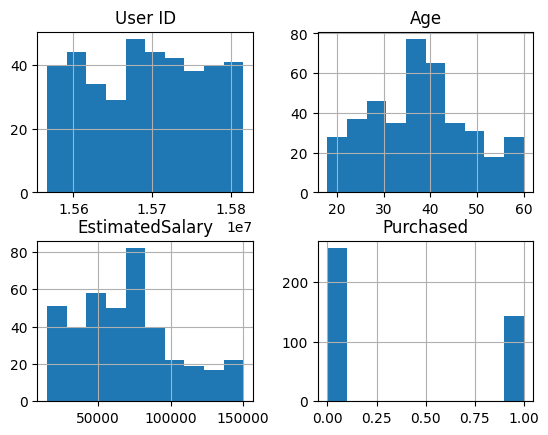

In [54]:
df.hist()

In [55]:
x=df.drop(['User ID','Gender','Purchased'],axis=1)

In [56]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [57]:
y = df['Purchased']

In [58]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, test_size = 0.25 , random_state=1)

In [61]:
x_train.head()

,Age,EstimatedSalary
82,20,49000
367,46,88000
179,31,34000
27,47,30000
89,35,50000


In [62]:
x_test.head()

,Age,EstimatedSalary
398,36,33000
125,39,61000
328,36,118000
339,39,122000
172,26,118000


In [63]:
y_test.head()

398    0
125    0
328    1
339    1
172    0
Name: Purchased, dtype: int64

In [64]:
y_train.head()

82     0
367    1
179    0
27     1
89     0
Name: Purchased, dtype: int64

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
std = StandardScaler()
x_train = std.fit_transform(x_train)

In [67]:
x_test = std.fit_transform(x_test)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
model = LogisticRegression()

In [70]:
model.fit(x_train, y_train)

LogisticRegression()

In [71]:
y_predict = model.predict(x_test)

In [72]:
y_predict

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [73]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [74]:
print(accuracy_score(y_test, y_predict))

0.78


In [75]:
print(precision_score(y_test, y_predict))

0.8125


In [76]:
print(recall_score(y_test, y_predict))

0.6190476190476191


In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
cm = confusion_matrix(y_test, y_predict)

In [79]:
tp, fp, fn, tn = cm.reshape(-1)

In [80]:
print("TP: ",tp," FP: ",fp," FN: ",fn," TN: ",tn)

TP:  52  FP:  6  FN:  16  TN:  26


In [81]:
from sklearn.metrics import ConfusionMatrixDisplay

In [82]:
cmd = ConfusionMatrixDisplay(cm)

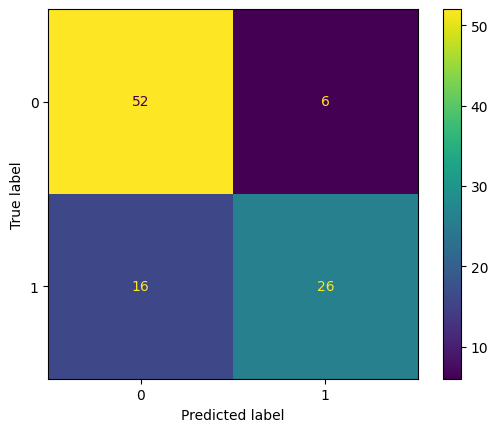

In [83]:
cmd.plot()

In [84]:
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83        58
           1       0.81      0.62      0.70        42

    accuracy                           0.78       100
   macro avg       0.79      0.76      0.76       100
weighted avg       0.78      0.78      0.77       100

